In [1]:
#data imports
from ucimlrepo import fetch_ucirepo
import pandas as pd
import seaborn as sns
import numpy as np

#pre processing imports
from sklearn.preprocessing import normalize
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.model_selection import StratifiedKFold

In [2]:
#models
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import AdaBoostClassifier, RandomForestClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.svm import SVC
from sklearn.linear_model import Perceptron

In [3]:
##metrics
from sklearn.metrics import accuracy_score, confusion_matrix, f1_score, precision_score, recall_score, mean_absolute_percentage_error

## Data Analysis

In [4]:
# fetch dataset 
rice_cammeo_and_osmancik = fetch_ucirepo(id=545) 
# data (as pandas dataframes) 
df_x = rice_cammeo_and_osmancik.data.features 
df_y = rice_cammeo_and_osmancik.data.targets 
  
# metadata 
#print(rice_cammeo_and_osmancik.metadata)  
# variable information 
#print(rice_cammeo_and_osmancik.variables) 

In [5]:
df = df_x.copy()
df['Class'] = df_y
df.head()

,Area,Perimeter,Major_Axis_Length,Minor_Axis_Length,Eccentricity,Convex_Area,Extent,Class
0,15231,525.578979,229.749878,85.093788,0.928882,15617,0.572896,Cammeo
1,14656,494.311005,206.020065,91.730972,0.895405,15072,0.615436,Cammeo
2,14634,501.122009,214.106781,87.768288,0.912118,14954,0.693259,Cammeo
3,13176,458.342987,193.337387,87.448395,0.891861,13368,0.640669,Cammeo
4,14688,507.166992,211.743378,89.312454,0.906691,15262,0.646024,Cammeo


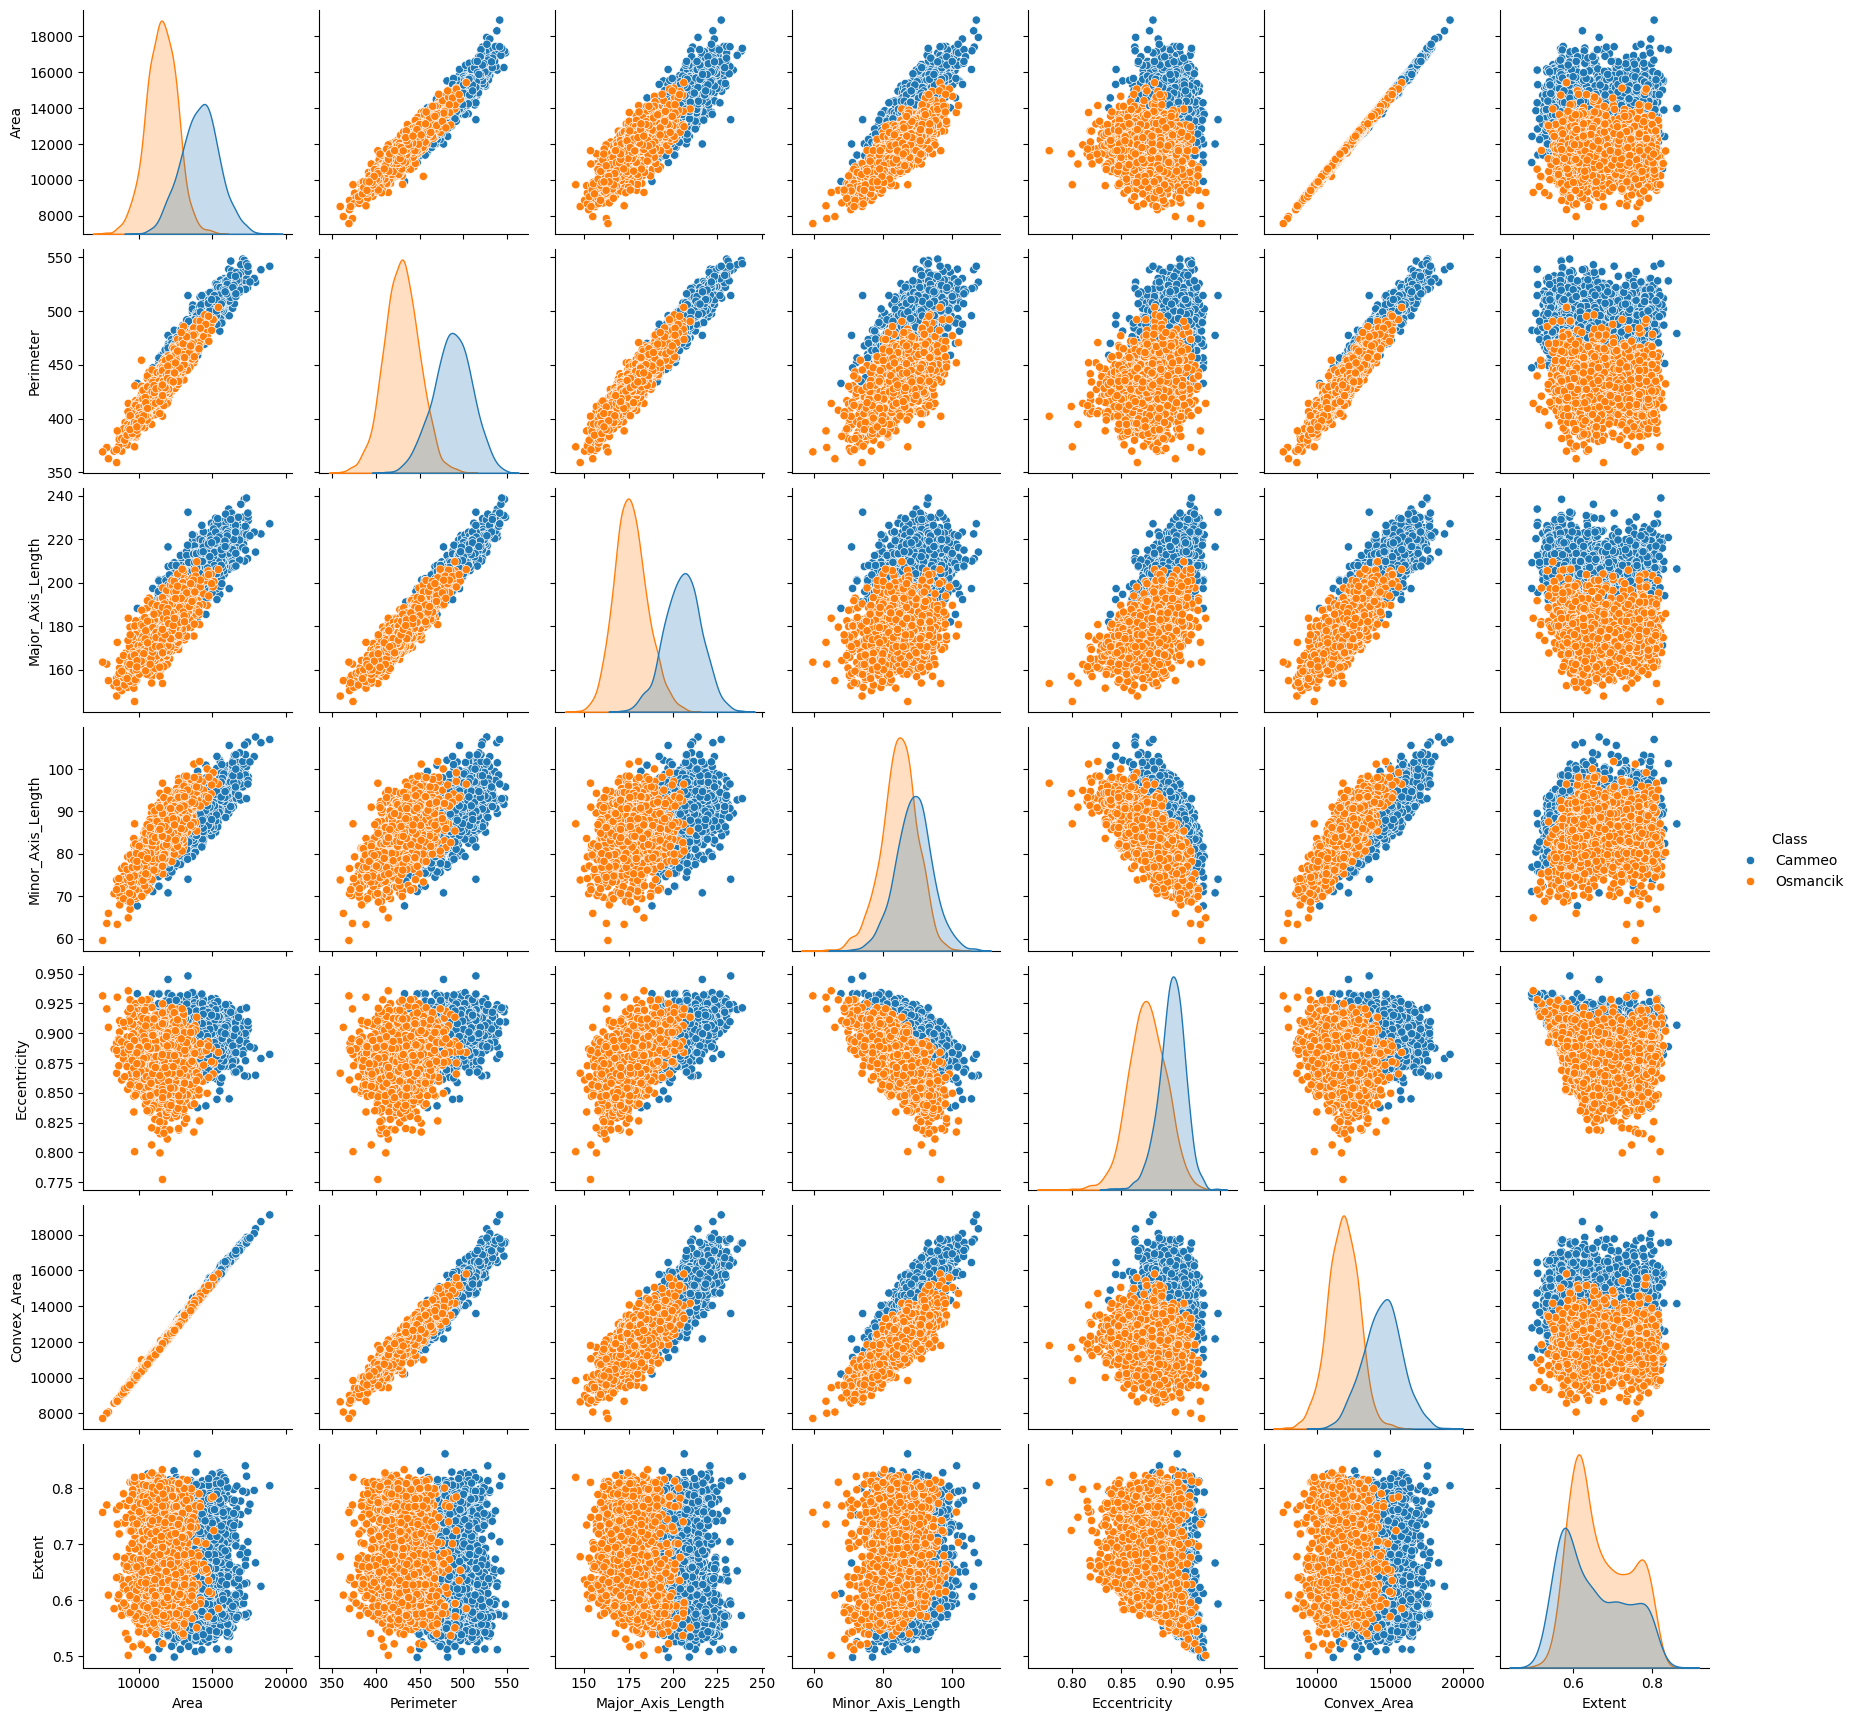

In [6]:
sns.pairplot(df, hue='Class')

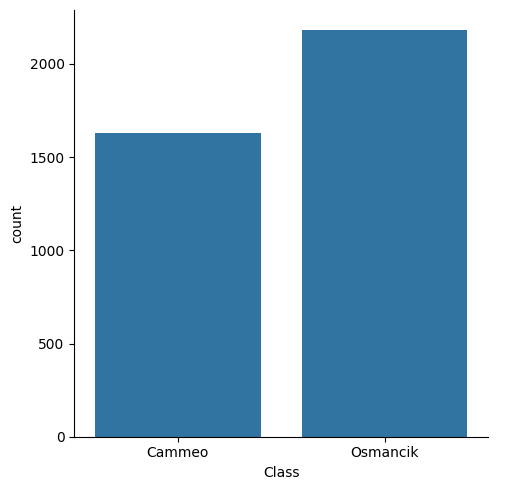

In [7]:
sns.catplot(data=df, x='Class', kind='count');

In [8]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3810 entries, 0 to 3809
Data columns (total 8 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Area               3810 non-null   int64  
 1   Perimeter          3810 non-null   float64
 2   Major_Axis_Length  3810 non-null   float64
 3   Minor_Axis_Length  3810 non-null   float64
 4   Eccentricity       3810 non-null   float64
 5   Convex_Area        3810 non-null   int64  
 6   Extent             3810 non-null   float64
 7   Class              3810 non-null   object 
dtypes: float64(5), int64(2), object(1)
memory usage: 238.3+ KB


## Data Preparation

In [9]:
l_encoder = LabelEncoder()
X = normalize(df_x)
y = l_encoder.fit_transform(df_y)

c:\Users\I857413\Desktop\TechSkills\fiap-classification-model\.venv\Lib\site-packages\sklearn\preprocessing\_label.py:114: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


In [10]:
SEED = 42
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.30, random_state=SEED)

## Models Initial

### SVC

In [12]:
svc = SVC(kernel='poly')
svc.fit(X_train, y_train)
svc_y_pred = svc.predict(X_test)
svc_accuracy = accuracy_score(y_test, svc_y_pred)
f1_score = f1_score(y_test, svc_y_pred, zero_division=0, average=None)
precision_score = precision_score(y_test, svc_y_pred)
recall_score = recall_score(y_test, svc_y_pred)
print(svc_accuracy)
print(f1_score)
print(precision_score)
print(recall_score)

0.5468066491688539
[0.         0.70701357]
0.5468066491688539
1.0


### KNN

In [13]:
knn = KNeighborsClassifier(n_neighbors=5)
knn.fit(X_train, y_train)
knn_y_pred = knn.predict(X_test)
knn_accuracy = accuracy_score(y_test, knn_y_pred)
print(knn_accuracy)


0.9046369203849519


### Decision Tree Classifier

In [14]:
treeClassifier = DecisionTreeClassifier(max_depth=7)
treeClassifier.fit(X_train, y_train)
treeClassifier_y_pred = treeClassifier.predict(X_test)
treeClassifier_accuracy = accuracy_score(y_test, treeClassifier_y_pred)
print(treeClassifier_accuracy)

0.9037620297462817


### Randon Forest Classifier

In [15]:
random_forest_classifier = RandomForestClassifier()
random_forest_classifier.fit(X_train, y_train)
random_forest_classifier_y_pred = random_forest_classifier.predict(X_test)
random_forest_classifier_accuracy = accuracy_score(y_test, random_forest_classifier_y_pred)
print(random_forest_classifier_accuracy)

0.9273840769903762


### Adaboost

In [16]:
ada = AdaBoostClassifier(estimator=treeClassifier, algorithm='SAMME')
ada.fit(X_train, y_train)
adar_y_pred = ada.predict(X_test)
ada_accuracy = accuracy_score(y_test, adar_y_pred)
print(ada_accuracy)

0.9168853893263342


### Perceptron

In [17]:
perceptron = Perceptron()
perceptron.fit(X_train, y_train)
perceptron_y_pred = perceptron.predict(X_test)
perceptron_accuracy = accuracy_score(y_test, perceptron_y_pred)
print(perceptron_accuracy)

0.905511811023622


## Models Improvement - Cross-Validation

Will follow with:

1 - AdaBoostClassifier - ada

2 - RandomForestClassifier - random_forest_classifier

3 - DecisionTreeClassifier - treeClassifier

4 - KNeighborsClassifier - knn

5 - Perceptron - perceptron

SVC performed way below the others so won't spend effort in fine tunning for now


In [18]:
# Since my dataset is not balanced I decided to use stractified kfold
def run_cross_validation(k=5, model=None, X=None, y=None):
    k = k
    kf = StratifiedKFold(n_splits=k, shuffle=True, random_state=SEED)
    mape_scores = []
    accuracy_scores = []
    # Realizando o K-Fold Cross-Validation
    for train_index, val_index in kf.split(X, y):
        x_train, x_test = X[train_index], X[val_index]
        y_train, y_test = y[train_index], y[val_index]
        model.fit(x_train, y_train)
        y_pred = model.predict(x_test)
        mape = mean_absolute_percentage_error(y_test, y_pred)
        accuracy = accuracy_score(y_test, y_pred)
        mape_scores.append(mape)
        accuracy_scores.append(accuracy)
    return(mape_scores, accuracy_scores)

### Ada with Cross-Validation

In [19]:
ada_mape_list, ada_accuracy_list = run_cross_validation(model=ada, X=X, y=y)
print(f'Mean MAPE: {np.mean(ada_mape_list)}')
print(f'Mean Accuracy: {round(np.mean(ada_accuracy_list),4)}')

Mean MAPE: 179671166236303.28
Mean Accuracy: 0.9228


### Random Forest with Cross-Validation

In [20]:
rf_mape_list, rf_accuracy_list = run_cross_validation(model=random_forest_classifier, X=X, y=y)
print(f'Mean MAPE: {np.mean(rf_mape_list)}')
print(f'Mean Accuracy: {round(np.mean(rf_accuracy_list),4)}')

Mean MAPE: 154848176164182.44
Mean Accuracy: 0.9307


### KNN with Cross-Validation

In [21]:
knn_mape_list, knn_accuracy_list = run_cross_validation(model=knn, X=X, y=y)
print(f'Mean MAPE: {np.mean(knn_mape_list)}')
print(f'Mean Accuracy: {round(np.mean(knn_accuracy_list),4)}')

Mean MAPE: 209222344893590.0
Mean Accuracy: 0.9129


### Decision Tree with Cross-Validation

In [22]:
tree_mape_list, tree_accuracy_list = run_cross_validation(model=treeClassifier, X=X, y=y)
print(f'Mean MAPE: {np.mean(tree_mape_list)}')
print(f'Mean Accuracy: {round(np.mean(tree_accuracy_list),4)}')

Mean MAPE: 197401873430675.3
Mean Accuracy: 0.9199


### KNN with Cross-Validation

In [23]:
knn_mape_list, knn_accuracy_list = run_cross_validation(model=knn, X=X, y=y)
print(f'Mean MAPE: {np.mean(knn_mape_list)}')
print(f'Mean Accuracy: {round(np.mean(knn_accuracy_list),4)}')

Mean MAPE: 209222344893590.0
Mean Accuracy: 0.9129


### Perceptron with Cross-Validation

In [24]:
perc_mape_list, perc_accuracy_list = run_cross_validation(model=perceptron, X=X, y=y)
print(f'Mean MAPE: {np.mean(perc_mape_list)}')
print(f'Mean Accuracy: {round(np.mean(perc_accuracy_list),4)}')

Mean MAPE: 521282791514537.7
Mean Accuracy: 0.8268
